<a href="https://colab.research.google.com/github/shubhamsorap/Mtech-DL-/blob/master/EXE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import cifar100
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test) = cifar100.load_data()
X_train = X_train.reshape((-1,32*32*3))
X_test = X_test.reshape((-1,32*32*3))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 3072) (50000, 100)
(10000, 3072) (10000, 100)


In [5]:
#build model
from keras.models import Sequential

initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=3072,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [6]:
#compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12500     
Total params: 443,316
Trainable params: 443,316
Non-trainable params: 0
_________________________________________________________________


In [8]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1407/1407 [==============================] - 8s 5ms/step - loss: 4.4948 - accuracy: 0.0321 - val_loss: 4.3065 - val_accuracy: 0.0334
Epoch 2/20
1407/1407 [==============================] - 8s 5ms/step - loss: 4.0794 - accuracy: 0.0736 - val_loss: 4.2321 - val_accuracy: 0.0620
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 3.8804 - accuracy: 0.1040 - val_loss: 3.9592 - val_accuracy: 0.0886
Epoch 4/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.7580 - accuracy: 0.1250 - val_loss: 3.7785 - val_accuracy: 0.1240
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.6619 - accuracy: 0.1435 - val_loss: 3.7890 - val_accuracy: 0.1230
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.5851 - accuracy: 0.1576 - val_loss: 3.7322 - val_accuracy: 0.1360
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.5203 - accuracy: 0.1683 - val_loss: 3.7594 - val_accuracy:

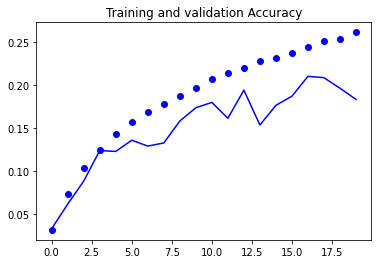

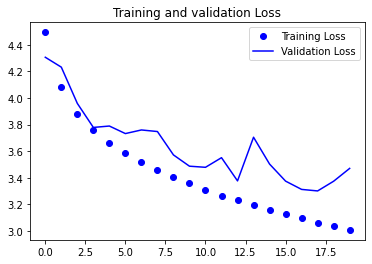

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

# Base Model for MNIST

In [9]:
from tensorflow.keras.datasets import mnist

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
X_train.shape,y_train.shape

((60000, 784), (60000, 10))

In [13]:
#build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [15]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7685 - accuracy: 0.7852 - val_loss: 0.2644 - val_accuracy: 0.9245
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2859 - accuracy: 0.9164 - val_loss: 0.2006 - val_accuracy: 0.9410
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2176 - accuracy: 0.9352 - val_loss: 0.1540 - val_accuracy: 0.9573
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1759 - accuracy: 0.9480 - val_loss: 0.1531 - val_accuracy: 0.9563
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9568 - val_loss: 0.1485 - val_accuracy: 0.9557
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1253 - accuracy: 0.9629 - val_loss: 0.1081 - val_accuracy: 0.9687
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1093 - accuracy: 0.9684 - val_loss: 0.1001 - val_accuracy:

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9742


[0.08573753386735916, 0.9742000102996826]

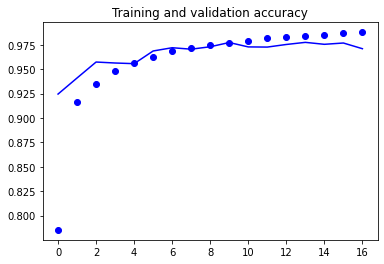

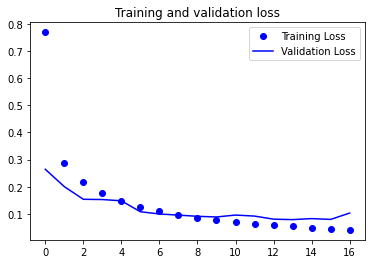

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Base model for fashion-mnist

In [18]:
from tensorflow.keras.datasets import fashion_mnist

In [19]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [22]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6903 - accuracy: 0.8027 - val_loss: 0.2838 - val_accuracy: 0.9153
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.9188 - val_loss: 0.1847 - val_accuracy: 0.9453
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2117 - accuracy: 0.9371 - val_loss: 0.1479 - val_accuracy: 0.9587
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1733 - accuracy: 0.9490 - val_loss: 0.1411 - val_accuracy: 0.9613
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1486 - accuracy: 0.9563 - val_loss: 0.1170 - val_accuracy: 0.9670
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1289 - accuracy: 0.9613 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1137 - accuracy: 0.9665 - val_loss: 0.1081 - val_accuracy:

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9723


[0.08849460631608963, 0.9722999930381775]

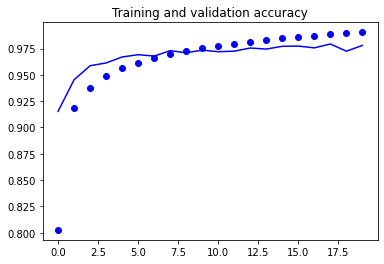

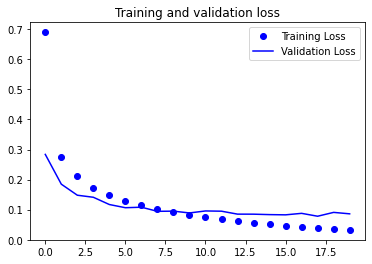

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()